# Decision Tree Lab

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [ ]:
data = arff.loadarff('iris.arff')
dataDF = pd.DataFrame(data[0])
dataDF['class'] = dataDF['class'].str.decode('utf-8')
dataNP = dataDF.to_numpy()
X = dataNP[:,0:4]
y = dataNP[:,4]

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
clf.score(X, y)

1.0

### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
clf.score(X, y)

0.9733333333333334

***Discussion:*** When I limit the max depth, I limit the number of decisions that can be made. The reason that I got 100% accuracy on the training set at first is because I allowed unlimited depth, so the tree overfit the data and split each leaf into a totally pure node. When I limit the depth, I limit the ability of the tree to overfit the data, to get completely pure nodes, so I don't get 100% accuracy. This is a good thing, as it lets the tree be more generalizable.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [ ]:
def loadVoting():
  data = arff.loadarff('voting.arff')
  dataDF = pd.DataFrame(data[0])
  dataDF = dataDF.map(lambda x: x.decode('utf-8'))
  dataDFfill = dataDF.replace('?', 'u')
  preX = dataDFfill.iloc[:, 0:16]
  prey = dataDFfill.iloc[:, 16]
  preXhot = pd.get_dummies(preX)
  X = preXhot.to_numpy()
  y = prey.to_numpy()
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
  return Xtrain, Xtest, ytrain, ytest, preXhot

In [ ]:
Xtrain, Xtest, ytrain, ytest, preXhot = loadVoting()
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
trainScore = clf.score(Xtrain, ytrain)
testScore = clf.score(Xtest, ytest)
print("Training score: ", trainScore)
print("Testing score: ", testScore)
voteClf = clf
voteX = preXhot

Training score:  1.0
Testing score:  0.9195402298850575


***Discussion:***
I handled missing values by make them all a new class, which I called `u`. My model did quite well on the data. It got 100% accuracy on the training set, as expected since we did not limit the tree from overfitting the data. It got a great score on the test data, 95%. The model seems to have done well with the missing data points, though I don't know how it actually interpreted them. I would be interested to see how well the tree could do on the test set once we limit the depth.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [ ]:
def loadCars():
  data = arff.loadarff('cars.arff')
  dataDF = pd.DataFrame(data[0])
  dataDFconvert = dataDF.map(lambda x: x.decode('utf-8'))
  preX = dataDFconvert.iloc[:, 0:6]
  prey = dataDFconvert.iloc[:, 6]
  preXhot = pd.get_dummies(preX)
  X = preXhot.to_numpy()
  y = prey.to_numpy()
  return X, y, preXhot

In [ ]:
X, y, preXhot = loadCars()
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Average accuracy (v=10): ", np.mean(scores))
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Average accuracy (v=5): ", np.mean(scores))
carsX = preXhot

[0.75722543 0.78612717 0.92485549 0.67630058 0.84971098 0.9132948
 0.89595376 0.86127168 0.9127907  0.84883721]
Average accuracy (v=10):  0.8426367791369808
[0.7283237  0.71387283 0.75433526 0.75362319 0.8057971 ]
Average accuracy (v=5):  0.7511904163525174


***Discussion***:

- 10 fold cross validation:

|  Run  | Accuracy |
| :---: | :------: |
|   1   |    76%   |
|   2   |    76%   |
|   3   |    94%   |
|   4   |    68%   |
|   5   |    85%   |
|   6   |    92%   |
|   7   |    88%   |
|   8   |    87%   |
|   9   |    91%   |
|  10   |    85%   |
|  Avg  |    84%   |

- 5 fold cross validation

|  Run  | Accuracy |
| :---: | :------: |
|   1   |    73%   |
|   2   |    71%   |
|   3   |    75%   |
|   4   |    75%   |
|   5   |    81%   |
|  Avg  |    75%   |

These results are not too surprising. It makes sense to me that when we do a higher fold cross validation that we get better results (that means that we are training on more of the data each fold, since we have split the data into more chunks).I was surprised to see that there were some folds in the 10-fold cross validation set that did quite terribly. This makes sense, though, as it is possible to get a test fold that is not very representative of the whole sample, so it would do less well when it came time to test that one fold.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

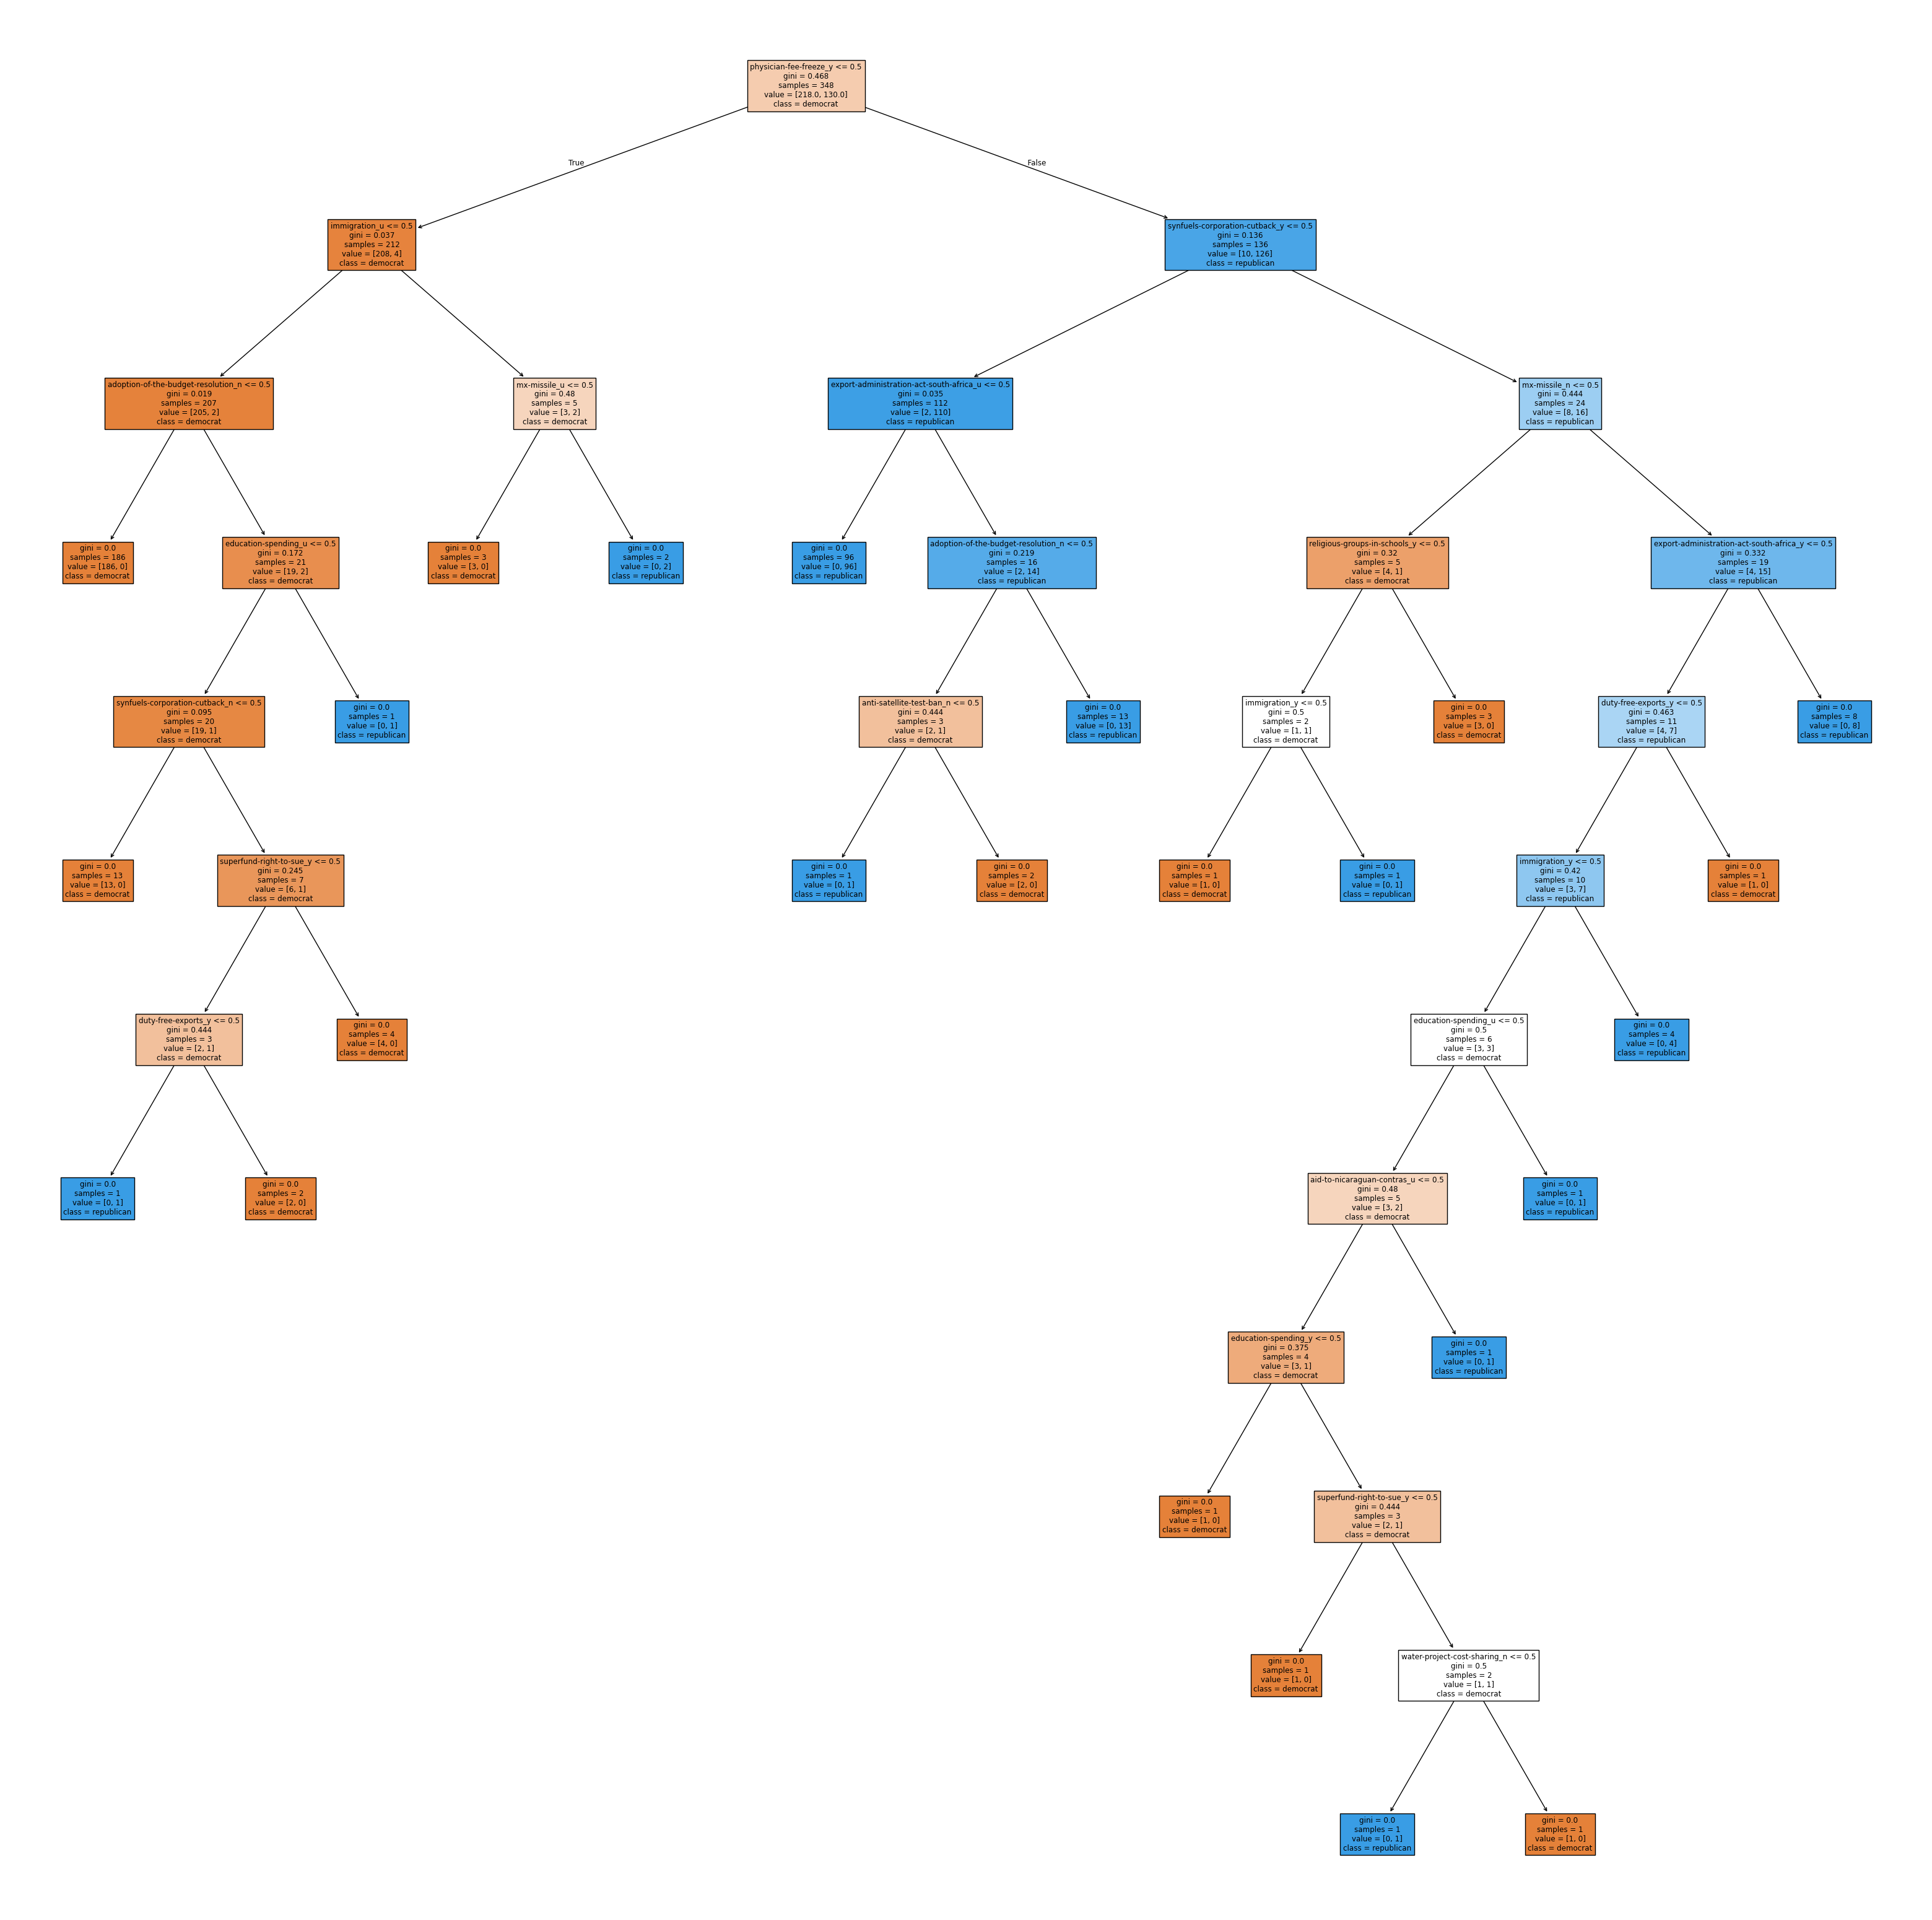

In [ ]:
plt.figure(figsize=(40, 40))
tree.plot_tree(voteClf, filled = True, class_names=voteClf.classes_, feature_names = voteX.columns.tolist())
print()
# plt.show()

In [ ]:
clfVote = DecisionTreeClassifier(max_depth=2)
clfVote.fit(Xtrain, ytrain)
print("Vote score: ", clfVote.score(Xtest, ytest))

clfCars = DecisionTreeClassifier(max_depth=2)
clfCars.fit(X, y)
print("Cars score: ", clfCars.score(X, y))

Vote score:  0.9425287356321839
Cars score:  0.7777777777777778


<Figure size 4000x4000 with 0 Axes>

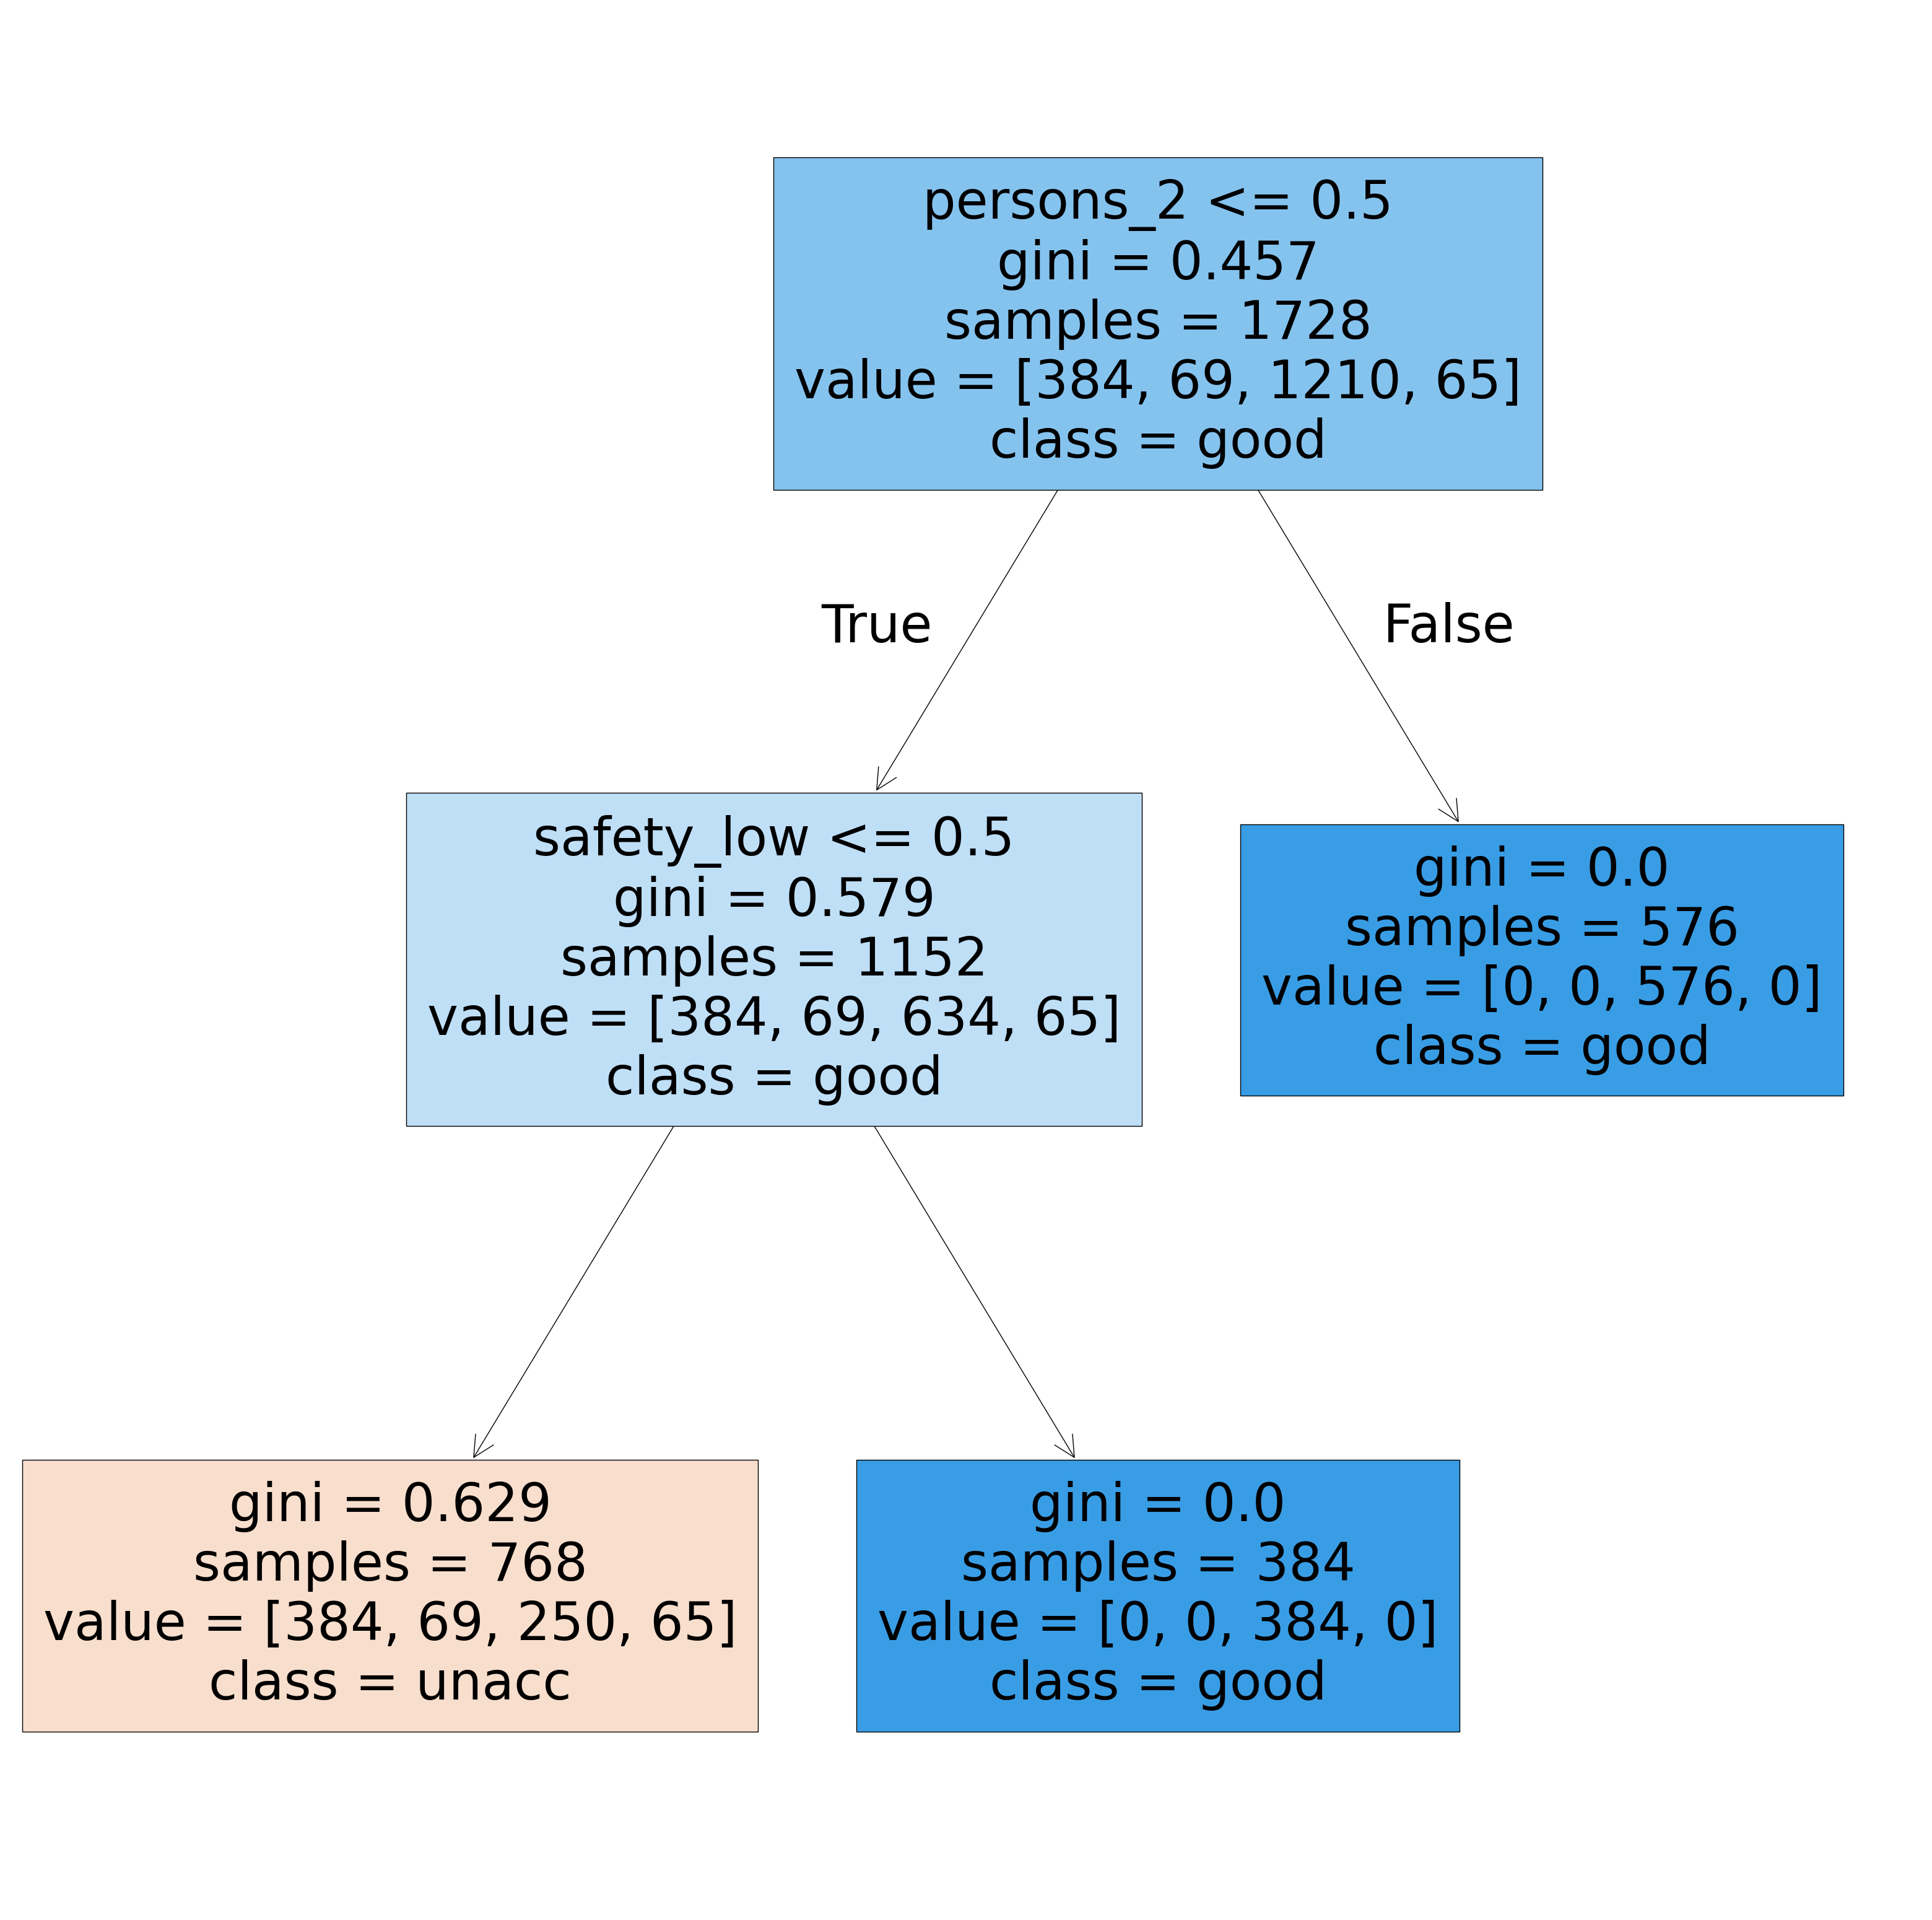

In [ ]:
votes = plt.figure(figsize=(40, 40))
# tree.plot_tree(clfVote, filled = True, class_names=clfVote.classes_, feature_names = voteX.columns.tolist())
# votes.show()
cars = plt.figure(figsize=(40, 40))
tree.plot_tree(clfCars, filled = True, class_names=["unacc", "acc", "good", "vgood"], feature_names = carsX.columns.tolist())
cars.show()

***Discussion***:
- About the voting data set before limiting it: it was interesting to see the overfit happening. There were some leaves far down the tree where one sample is by itself. This one sample was of one class, but it was downstream of quite a few of decisions that were of the majority of the other class. I just thought it was interesting to see how that one sample, that one voter, would vote so similarly to the other party until one key issue. It was also interesting to see how some of the earlier, more meaningful decisions, were based on whether or not someone even voted for a certain bill.

- About the voting set when it was limited: the fitting still did an excellent job on the accuracy of the training set, even with a limited depth. That was interesting. I guess that shows how easy it is to know the party of someone based on their voting patterns, which makes sense.

  - About the rules the tree learned: It appears that if someone voted to freeze physician fees, they are more likely to be Republican. Furthermore, if those who did vote for that did NOT vote about the bill on immigration (207 to 5), this further shows their allegiance to the Democratic party. On the other, for those who voted against freezing physician fees, those who voted to cutback on the Synfuels corporation (112 to 24) showed their allegiance more to the Republican party. In short, from looking at votes on only a few bills, it is pretty easy to see which party a voter aligns themself with.

- About the car set when it was limited: the model did not fit well, even though it wasn't split into training and test data. It is intersting to think that this data set is harder to learn at a limited depth than predicting the party of a voter based on their votes. One thing that may be contributing to this is the fact that there are more classes in this data set, so the depth limit makes it harder to split into good leaves (indeed, by changing to a depth of 4 or 6 increases the accuracy quite a bit).

  - As for the rules the tree learned: if a car has room for only 2 people, it is automatically good, no other considerations needed. Then, if it has high safety, it is also good without question. Anything else that has room for more than 2 people or has higher safety needs more decision to determine it. This tree helps me see why the accuracy is so low. From the first two decisions, two pure leaves have been made, both belonging to the same class. The last leaf, the impure one, has some 'good' cars and all of the other classes in there. That makes it hard to get good accuracy.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
print("Entropy score: ", clf.score(X, y))
print("Depth: ", clf.tree_.max_depth)
print("Nodes: ", clf.tree_.node_count)

clf = DecisionTreeClassifier(criterion='log_loss')
clf.fit(X, y)
print("Log loss score: ", clf.score(X, y))
print("Depth: ", clf.tree_.max_depth)
print("Nodes: ", clf.tree_.node_count)

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y)
print("Gini score: ", clf.score(X, y))
print("Depth: ", clf.tree_.max_depth)
print("Nodes: ", clf.tree_.node_count)

Entropy score:  1.0
Depth:  14
Nodes:  157
Log loss score:  1.0
Depth:  14
Nodes:  157
Gini score:  1.0
Depth:  14
Nodes:  183


***Discussion***: Honestly, the criterion doesn't seem to matter a ton. I ran the trees with the three criteria multiple times and each time one would do better than the others (only the Compare Entropy and LogLoss), while other times they would all do equally well. When I say they did equally well, I mean they got the same accuracy (100%) and their depth/number of nodes were pretty much equal (around 13 for the depth and 180 for the number of nodes). When I limited the depth, they all performed almost equally well again, getting accuracies that were pretty much the same for each one (93% for a depth of 7, 81% for a depth of 4, 77% for a depth of 2). So, it doesn't seem that these different criteria for splitting matter for a data set such as this one, maybe due to its simplicity.

## 3 Overfit Avoidance with Decision Trees

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [54]:
X, y, preXhot = loadCars()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()
full = clf.fit(Xtrain, ytrain)
# print("Fully induced tree:")
# print("Training score: ", full.score(Xtrain, ytrain))
# print("Testing score: ", full.score(Xtest, ytest))
# print("Nodes: ", full.tree_.node_count)
# print("Depth: ", full.tree_.max_depth)

clf = DecisionTreeClassifier(min_samples_leaf = 80)
minLeaf = clf.fit(Xtrain, ytrain)
# print("Min samples leaf:")
# print("Training score: ", minLeaf.score(Xtrain, ytrain))
# print("Testing score: ", minLeaf.score(Xtest, ytest))
# print("Nodes: ", minLeaf.tree_.node_count)
# print("Depth: ", minLeaf.tree_.max_depth)

clf = DecisionTreeClassifier(min_samples_split = 80)
minSplit = clf.fit(Xtrain, ytrain)
# print("Min samples split:")
# print("Training score: ", minSplit.score(Xtrain, ytrain))
# print("Testing score: ", minSplit.score(Xtest, ytest))
# print("Nodes: ", minSplit.tree_.node_count)
# print("Depth: ", minSplit.tree_.max_depth)

clf = DecisionTreeClassifier(min_impurity_decrease = 0.1)
minImpurityDecrease = clf.fit(Xtrain, ytrain)
# print("Min impurity decrease:")
# print("Training score: ", minImpurityDecrease.score(Xtrain, ytrain))
# print("Testing score: ", minImpurityDecrease.score(Xtest, ytest))
# print("Nodes: ", minImpurityDecrease.tree_.node_count)
# print("Depth: ", minImpurityDecrease.tree_.max_depth)

clf = DecisionTreeClassifier(max_depth = 3)
maxDepth = clf.fit(Xtrain, ytrain)
# print("Max depth:")
# print("Training score: ", maxDepth.score(Xtrain, ytrain))
# print("Testing score: ", maxDepth.score(Xtest, ytest))
# print("Nodes: ", maxDepth.tree_.node_count)
# print("Depth: ", maxDepth.tree_.max_depth)

clf = DecisionTreeClassifier(max_leaf_nodes = 10)
maxLeafNodes = clf.fit(Xtrain, ytrain)
# print("Max leaf nodes:")
# print("Training score: ", maxLeafNodes.score(Xtrain, ytrain))
# print("Testing score: ", maxLeafNodes.score(Xtest, ytest))
# print("Nodes: ", maxLeafNodes.tree_.node_count)
# print("Depth: ", maxLeafNodes.tree_.max_depth)

clf = DecisionTreeClassifier(max_features = 2)
maxFeatures = clf.fit(Xtrain, ytrain)
# print("Max features:")
# print("Training score: ", maxFeatures.score(Xtrain, ytrain))
# print("Testing score: ", maxFeatures.score(Xtest, ytest))
# print("Nodes: ", maxFeatures.tree_.node_count)
# print("Depth: ", maxFeatures.tree_.max_depth)

***Discussion***:

Fully induced tree:
- Training score:  1.0
- Testing score:  0.96
- Nodes:  187
- Depth:  13

| Min Samples Leaf | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|1|100|97|187|13|
|10|95|94|75|10|
|20|92|90|43|9|
|40|86|86|25|8|
|80|80|81|11|5|

| Min Samples Split | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|2|100|97|187|13|
|10|97|96|121|12|
|20|95|92|73|10|
|40|92|91|49|10|
|80|89|88|27|8|

| Min Impurity Decrease | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|0.0001|100|96|187|13|
|0.001|97|92|75|11|
|0.01|88|87|17|5|
|0.1|69|73|1|0|

- The Min Samples Leaf does not limit the accuracy terribly at the beginning. As the number of this increased, however, the accuracy got increasingly worse and the tree got much shallower.
- In contrast, the Min Samples Split does not change the accuracy terribly much even with similar values to Min Samples Leaf. Even with high values for this parameter, the accuracy stayed above/around 90%. The depth of the tree was never significantly impacted, and the number of nodes stayed high. I would have to change this more dramatically to get any actual hinderance to the model.
- Changing he Min Impurity Decrease seemed to have the greatest effect. At just 0.0001 for the parameter, the tree was completely accurate on the training data and very accurate on the test data. When I changed that by only three orders of magnitude, the tree was not able to gain any depth at all.

| Max Depth | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|15|100|97|187|14|
|12|98|97|177|12|
|10|98|96|141|10|
|7|93|91|57|7|
|3|80|82|7|3|

| Max Leaf Nodes | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|100|100|97|187|14|
|75|99|97|149|14|
|50|98|97|99|11|
|25|95|93|49|8|
|10|88|88|19|6|

| Max Features | Training Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|10|100|98|263|13|
|8|100|92|377|15|
|6|100|90|471|14|
|4|100|88|711|15|
|2|100|82|869|15|

- The Max Depth parameter has quite an effect on the accuracy of the tree. At first, the effect is not great, staying around 98%. Once the parameter gets to about half of what the fully induced tree uses, the accuract begins to drop precipitously, going down to 93% and then on down to 80%.

- The Max Leaf Nodes parameter did not have as great an affect on the accuracies as did the max depth. I had to scale down from 100 to 10 in order to get an appreciable decrease in the accuracy. This parameter was able to drastically cut the number of nodes (from 187 to 99) and maintain good accuracies.

- The Max Features parameter was the most interesting. No matter how small I made it, the training accuracy was 100%. I assume this was due to the fact that the tree could still go as deep as needed, make as many splits as needed, even if it could only consider so many features at each split. This was seen by the huge increase in depth and nodes as I dropped the Max Features value. Due to this, there was a ton of overfit with small values, so the accuracy on the test set got worse and worse, which makes sense.


### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [62]:
clf = DecisionTreeClassifier(ccp_alpha=0.003)
full = clf.fit(Xtrain, ytrain)
print("Fully induced tree:")
print("Training score: ", full.score(Xtrain, ytrain))
print("Testing score: ", full.score(Xtest, ytest))
print("Nodes: ", full.tree_.node_count)
print("Depth: ", full.tree_.max_depth)

Fully induced tree:
Training score:  0.9587554269175108
Testing score:  0.9566473988439307
Nodes:  57
Depth:  10


***Discussion***:

| ccp_alpha | Train Accuracy | Test Accuracy | Nodes | Depth |
|:---:|:---:|:---:|:---:|:---:|
|0.0001|100|97|195|14|
|0.0005|100|97|155|14|
|0.001|99|96|109|11|
|0.003|96|96|57|10|
|0.005|93|94|37|8|
|0.01|89|90|21|7|
|0.05|78|78|5|2|

- I think that the value for ccp_alpha that works best is 0.001 or 0.003. Both gave great accuracies on the training set as well as the test set. The 0.003 value resulted in a much smaller tree without a big decrease in the accuracy, so that may be the best value after all. It was interesting to see how quickly the accuracy dropped off with values greater than 0.001.

## 4. Decision Tree Regression


### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [76]:
data = pd.read_excel('Concrete_Data.xls')
dataNP = data.to_numpy()
X = dataNP[:,0:8]
y = dataNP[:,8]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeRegressor()
clf.fit(Xtrain, ytrain)
pred = clf.predict(Xtest)
numLeaves = clf.get_n_leaves()
print("Nodes: ", clf.tree_.node_count)
print("Leaves: ", numLeaves)
print("Depth: ", clf.tree_.max_depth)
print("Training score: ", clf.score(Xtrain, ytrain))
print("Testing score: ", clf.score(Xtest, ytest))
print("MAE: ", mean_absolute_error(ytest, pred))

Nodes:  1581
Leaves:  791
Depth:  21
Training score:  0.9962693269011612
Testing score:  0.8662318319185078
MAE:  3.8568020372215854


***Discussion***:
- I left the tree completely unhindered, as I thought it would be interesting to see how it compared to the other unhindered trees.
- It did quite well. Whereas other trees scored 100% on their accuracy for the training set when not restricted, this data got a coefficient of determination of 0.996, not 1.0. I did not expect that. I wonder if that has to do with the fact that a regression model doesn't overfit as well as a classification model, or if it has to do with the difficulty of the data set.
- Regardless, it got a coefficient of determination of 0.91 for the test set. I was surprised by this as well, as it was lower than the accuracies the classification models were getting on their test sets. It does match what I saw with the training set for this data, though.
- The number of nodes in this tree was much greater than anything I saw with the other data sets, though this is likely due to the fact that there are far more samples in this data set than the others.  
- The MAE for this data set was not superb, but also not terrible. For values that range from 7 to 82, an MAE of 4 seems acceptable.